# IBM HR Analytics Employee Attrition Modeling.

### -----------------------------------------------------------------------------------------------------------------------------------------------

# DESCRIPTION

#### IBM is an American MNC operating in around 170 countries with major business vertical as computing, software, and hardware.
#### Attrition is a major risk to service-providing organizations where trained and experienced people are the assets of the company. The organization would like to identify the factors which influence the attrition of employees.

##### Data Dictionary
Age: Age of employee<br>
Attrition: Employee attrition status<br>
Department: Department of work<br>
DistanceFromHome<br>
Education: 1-Below College; 2- College; 3-Bachelor; 4-Master; 5-Doctor;<br>
EducationField<br>
EnvironmentSatisfaction: 1-Low; 2-Medium; 3-High; 4-Very High;<br>
JobSatisfaction: 1-Low; 2-Medium; 3-High; 4-Very High;<br>
MaritalStatus<br>
MonthlyIncome<br>
NumCompaniesWorked: Number of companies worked prior to IBM<br>
WorkLifeBalance: 1-Bad; 2-Good; 3-Better; 4-Best;<br>
YearsAtCompany: Current years of service in IBM<br>
Analysis Task:<br>
- Import attrition dataset and import libraries such as pandas, matplotlib.pyplot, numpy, and seaborn.<br>
- Exploratory data analysis<br>

Find the age distribution of employees in IBM<br>
Explore attrition by age<br>
Explore data for Left employees<br>
Find out the distribution of employees by the education field<br>
Give a bar chart for the number of married and unmarried employees<br>
- Build up a logistic regression model to predict which employees are likely to attrite.<br>

## <u>Solution :</u>

In [168]:
# importing required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

In [2]:
# accesing the dataset
dataset = pd.read_csv('IBM Attrition Data.csv')
dataset

Age Attrition              Department  DistanceFromHome  Education  \
0      41       Yes                   Sales                 1          2   
1      49        No  Research & Development                 8          1   
2      37       Yes  Research & Development                 2          2   
3      33        No  Research & Development                 3          4   
4      27        No  Research & Development                 2          1   
...   ...       ...                     ...               ...        ...   
1465   36        No  Research & Development                23          2   
1466   39        No  Research & Development                 6          1   
1467   27        No  Research & Development                 4          3   
1468   49        No                   Sales                 2          3   
1469   34        No  Research & Development                 8          3   

     EducationField  EnvironmentSatisfaction  JobSatisfaction MaritalStatus  \
0     Life Sciences                        2                4        Single   
1     Life Sciences                        3                2       Married   
2             Other                        4                3        Single   
3     Life Sciences                        4                3       Married   
4           Medical                        1                2       Married   
...             ...                      ...              ...           ...   
1465        Medical                        3                4       Married   
1466        Medical                        4                1       Married   
1467  Life Sciences                        2                2       Married   
1468        Medical                        4                2       Married   
1469        Medical                        2                3       Married   

      MonthlyIncome  NumCompaniesWorked  WorkLifeBalance  YearsAtCompany  
0              5993                   8                1               6  
1              5130                   1                3              10  
2              2090                   6                3               0  
3              2909                   1                3               8  
4              3468                   9                3               2  
...             ...                 ...              ...             ...  
1465           2571                   4                3               5  
1466           9991                   4                3               7  
1467           6142                   1                3               6  
1468           5390                   2                2               9  
1469           4404                   2                4               4  

[1470 rows x 13 columns]

In [3]:
# getting info of the dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      1470 non-null   int64 
 1   Attrition                1470 non-null   object
 2   Department               1470 non-null   object
 3   DistanceFromHome         1470 non-null   int64 
 4   Education                1470 non-null   int64 
 5   EducationField           1470 non-null   object
 6   EnvironmentSatisfaction  1470 non-null   int64 
 7   JobSatisfaction          1470 non-null   int64 
 8   MaritalStatus            1470 non-null   object
 9   MonthlyIncome            1470 non-null   int64 
 10  NumCompaniesWorked       1470 non-null   int64 
 11  WorkLifeBalance          1470 non-null   int64 
 12  YearsAtCompany           1470 non-null   int64 
dtypes: int64(9), object(4)
memory usage: 149.4+ KB


In [4]:
# using describe function on the dataset
dataset.describe()

Age  DistanceFromHome    Education  EnvironmentSatisfaction  \
count  1470.000000       1470.000000  1470.000000              1470.000000   
mean     36.923810          9.192517     2.912925                 2.721769   
std       9.135373          8.106864     1.024165                 1.093082   
min      18.000000          1.000000     1.000000                 1.000000   
25%      30.000000          2.000000     2.000000                 2.000000   
50%      36.000000          7.000000     3.000000                 3.000000   
75%      43.000000         14.000000     4.000000                 4.000000   
max      60.000000         29.000000     5.000000                 4.000000   

       JobSatisfaction  MonthlyIncome  NumCompaniesWorked  WorkLifeBalance  \
count      1470.000000    1470.000000         1470.000000      1470.000000   
mean          2.728571    6502.931293            2.693197         2.761224   
std           1.102846    4707.956783            2.498009         0.706476   
min           1.000000    1009.000000            0.000000         1.000000   
25%           2.000000    2911.000000            1.000000         2.000000   
50%           3.000000    4919.000000            2.000000         3.000000   
75%           4.000000    8379.000000            4.000000         3.000000   
max           4.000000   19999.000000            9.000000         4.000000   

       YearsAtCompany  
count     1470.000000  
mean         7.008163  
std          6.126525  
min          0.000000  
25%          3.000000  
50%          5.000000  
75%          9.000000  
max         40.000000

In [5]:
# getting the column names from the dataset
columns_ = dataset.columns.values
columns_

array(['Age', 'Attrition', 'Department', 'DistanceFromHome', 'Education',
       'EducationField', 'EnvironmentSatisfaction', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked',
       'WorkLifeBalance', 'YearsAtCompany'], dtype=object)

In [6]:
# checking the columns type
type(columns_)

numpy.ndarray

# EDA

In [7]:
# extracting the ages from the dataset
age = dataset['Age'].value_counts()
age_groups = age.keys().values

age_groups

array([35, 34, 36, 31, 29, 32, 30, 33, 38, 40, 37, 27, 28, 42, 39, 45, 41,
       26, 44, 46, 43, 50, 25, 24, 49, 47, 55, 51, 53, 48, 54, 52, 22, 56,
       23, 58, 21, 20, 59, 19, 18, 60, 57], dtype=int64)

In [8]:
# checking the age_groups type
type(age_groups)

numpy.ndarray

In [9]:
# separating the age count from the age dataframe
age_count_for_age_groups = []

for i in age_groups:
    age_count_for_age_groups.append(age[i])


# converting it into numpy array
age_count_for_age_groups = np.array(age_count_for_age_groups)

# showing the age count
age_count_for_age_groups

array([78, 77, 69, 69, 68, 61, 60, 58, 58, 57, 50, 48, 48, 46, 42, 41, 40,
       39, 33, 33, 32, 30, 26, 26, 24, 24, 22, 19, 19, 19, 18, 18, 16, 14,
       14, 14, 13, 11, 10,  9,  8,  5,  4], dtype=int64)

In [10]:
# showing the age count data type
type(age_count_for_age_groups)

numpy.ndarray

In [11]:
# PLotting Bar graph for Age Groups
plt.figure(figsize=(15,10))
style.use('ggplot')

# for making the background white
ax = plt.axes()
ax.set_facecolor('white')

plt.bar(age_groups, age_count_for_age_groups, width=0.5)
plt.xlabel('Age Groups in Years')
plt.ylabel('No of Employees')
plt.title('Age Groups')
plt.grid(color='blue', linestyle='-', linewidth=0.5)
plt.show()

## Exploring attrition by Age

##### 1. Number of 'Yes' and 'No' Counts i.e. No of people are under attrition type Yes and No

In [12]:
# extracting the age column
attrition_data = dataset['Attrition']
attrition_data

0       Yes
1        No
2       Yes
3        No
4        No
       ... 
1465     No
1466     No
1467     No
1468     No
1469     No
Name: Attrition, Length: 1470, dtype: object

In [34]:
# counting the total no of Yes and No under the Attrition column
attrition_data = dataset['Attrition']
opinions = attrition_data.value_counts()
opinions

No     1233
Yes     237
Name: Attrition, dtype: int64

In [15]:
opinion_types = opinions.keys()
opinion_types

Index(['No', 'Yes'], dtype='object')

In [16]:
opinion_counts = [opinions[0], opinions[1]]
opinion_counts

[1233, 237]

In [17]:
# plt.figure(figsize=(10,7))
# ax = plt.axes()
# ax.set_facecolor('white')
# plt.bar(opinion_types, opinion_counts, color='r', width=0.5)
# plt.xlabel('Attrition types')
# plt.ylabel('Count')
# plt.title('Attrition')
# plt.grid(color='blue', linestyle='-', linewidth=0.5)
# plt.show()

In [66]:
# creating a common FUNCTION for plotting and reuse later in our code
def category_plot(attr):
    sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})
    sns.catplot(data=dataset, kind='count', height=5, aspect=1.5, x=attr, legend=True)
    plt.grid(color='blue', linestyle='-', linewidth=0.5)

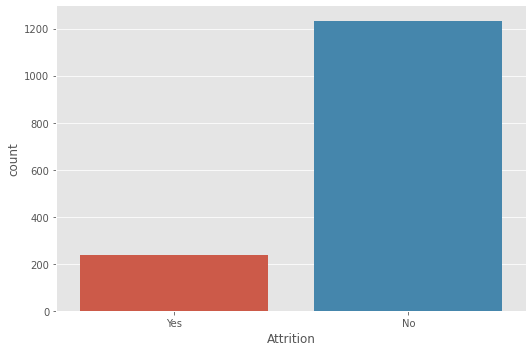

In [35]:
# Plotting Attrition Column
category_plot('Attrition')

In [36]:
# conclusion drawn from the plot
# So there are above 200 people who have been attrited and avobe 1200 people who have not been attrited.
# Yes -- >> 237a
# No -- >> 1233

##### 2. Now we will try to find the age groups of the people who have been attrited and also who have not been attrited,
##### i.e, for the Left Employees

In [38]:
# Now plotting the Age column with the Attrition columnn
plt.figure(figsize=(10,7))
ax = plt.axes()
ax.set_facecolor('white')
plt.scatter(dataset['Attrition'], dataset['Age'], color='b', alpha=0.15)
plt.xlabel('Attrition types')
plt.ylabel('Age')
plt.title('Attrition vs Age')
plt.grid(color='blue', linestyle='-', linewidth=0.5)
plt.show()

In [39]:
# conclusion drawn from the plot
# So maximum number of people who have been attributed fall under the range of 25 to 40.
# Whereas for the not attributed category the range seem to be allover the category itself.

## Distribution of Employees in the Educational field

In [40]:
# extracting the educational field column
employee = dataset['EducationField']

In [43]:
# getting the counts of subjects under 'EducationField'
employee.value_counts()

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

In [67]:
# plotting the educational field column
# by using the user made function category plot

category_plot('EducationField')

In [70]:
# conclusion drawn from the plot
# Life Science is the educational field with highest employees
# Human Resource is the educationl field with the lowest emplyees

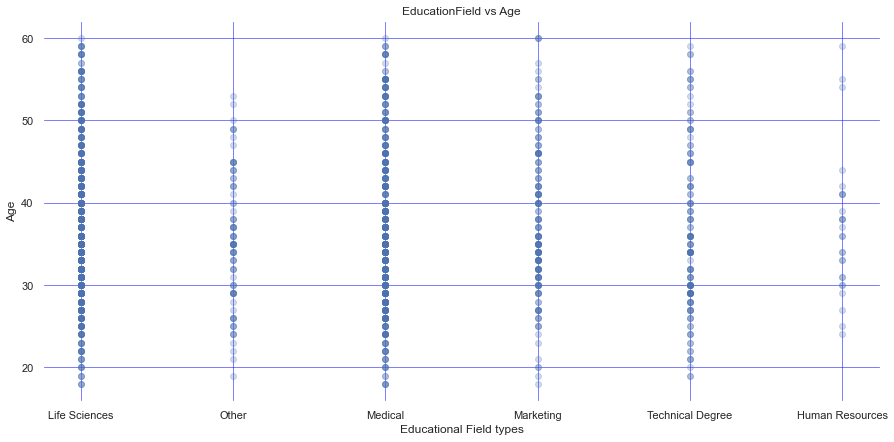

In [74]:
# now lets see the Age distribution of employees among the educational fields
plt.figure(figsize=(15,7))
ax = plt.axes()
ax.set_facecolor('white')
plt.scatter(dataset['EducationField'], dataset['Age'], color='b', alpha=0.25)
plt.xlabel('Educational Field types')
plt.ylabel('Age')
plt.title('EducationField vs Age')
plt.grid(color='blue', linestyle='-', linewidth=0.5)
plt.show()

In [77]:
# conclusion drawn from the plot

# Life Science has employees from the age range of 18 to 60
# Medical has employees from the age range of 18 to 60
# Marketig has employees from the age range of 25 to 55
# Technical Degree has employees from the age range of 20 to 50
# Other has employees from the age range of 30 to 40
# Human Resource has employees from the age range of 30 to 40 although it is very scarce over the range

## Bar chart for Maritial Status

In [83]:
# extracting the MaritalStatus column
maritial_status = dataset['MaritalStatus']

In [97]:
# getting a count of the variables in the column
m = maritial_status.value_counts()
m

Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64

In [98]:
# getting the labels of the column
label = m.keys()
label

Index(['Married', 'Single', 'Divorced'], dtype='object')

In [116]:
# getting the label counts
label_counts = m.values
label_counts

array([673, 470, 327], dtype=int64)

In [133]:
def funtion_for_value(pct, all_value):
    absolute = pct/100 *np.sum(all_value)
    return "{:.1f}%\n({:d})".format(pct, round(absolute))

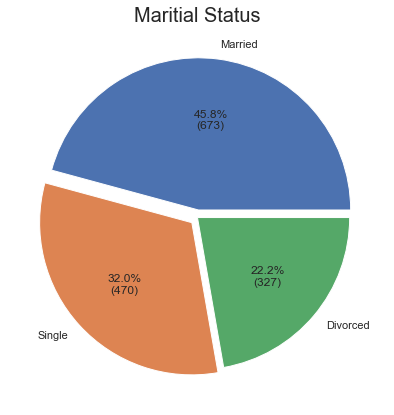

In [134]:
# plotting the pie chart
plt.figure(figsize=(7,7))
explode = (0.05, 0.05, 0)
plt.pie(label_counts, labels=label, explode=explode, autopct = lambda pct : funtion_for_value(pct, label_counts))
plt.title('Maritial Status', size=20)
plt.show()

In [135]:
# conclusion drawn from the plot

# Number of Married Employee -->> 673
# Number of Single Employee -->> 470
# Number of Divorced Employee -->> 327
# Clearly majority of the employees are married followed by singles and then divorced.

# Model building

### We will use Logistic regression model for prediction

In [138]:
# View the dataset again
dataset

Age Attrition              Department  DistanceFromHome  Education  \
0      41       Yes                   Sales                 1          2   
1      49        No  Research & Development                 8          1   
2      37       Yes  Research & Development                 2          2   
3      33        No  Research & Development                 3          4   
4      27        No  Research & Development                 2          1   
...   ...       ...                     ...               ...        ...   
1465   36        No  Research & Development                23          2   
1466   39        No  Research & Development                 6          1   
1467   27        No  Research & Development                 4          3   
1468   49        No                   Sales                 2          3   
1469   34        No  Research & Development                 8          3   

     EducationField  EnvironmentSatisfaction  JobSatisfaction MaritalStatus  \
0     Life Sciences                        2                4        Single   
1     Life Sciences                        3                2       Married   
2             Other                        4                3        Single   
3     Life Sciences                        4                3       Married   
4           Medical                        1                2       Married   
...             ...                      ...              ...           ...   
1465        Medical                        3                4       Married   
1466        Medical                        4                1       Married   
1467  Life Sciences                        2                2       Married   
1468        Medical                        4                2       Married   
1469        Medical                        2                3       Married   

      MonthlyIncome  NumCompaniesWorked  WorkLifeBalance  YearsAtCompany  
0              5993                   8                1               6  
1              5130                   1                3              10  
2              2090                   6                3               0  
3              2909                   1                3               8  
4              3468                   9                3               2  
...             ...                 ...              ...             ...  
1465           2571                   4                3               5  
1466           9991                   4                3               7  
1467           6142                   1                3               6  
1468           5390                   2                2               9  
1469           4404                   2                4               4  

[1470 rows x 13 columns]

### we have a few categorical columns in the dataset
### we need to change the values into integer type

In [144]:
# Changing the Attrition column values
dataset['Attrition'].replace('Yes', 1, inplace=True)
dataset['Attrition'].replace('No', 0, inplace=True)

# Changing the Department Column Values
dataset['Department'].replace('Research & Development', 1, inplace=True)
dataset['Department'].replace('Sales', 2, inplace=True)
dataset['Department'].replace('Human Resources', 3, inplace=True)

# Changing the Educational Field values
dataset['EducationField'].replace('Life Sciences', 1, inplace=True)
dataset['EducationField'].replace('Medical', 2, inplace=True)
dataset['EducationField'].replace('Marketing', 3, inplace=True)
dataset['EducationField'].replace('Technical Degree', 4, inplace=True)
dataset['EducationField'].replace('Other', 5, inplace=True)
dataset['EducationField'].replace('Human Resources', 6, inplace=True)

# Changing the Maritial Status column values
dataset['MaritalStatus'].replace('Married', 1, inplace=True)
dataset['MaritalStatus'].replace('Single', 2, inplace=True)
dataset['MaritalStatus'].replace('Divorced', 3, inplace=True)

In [145]:
# view the dataset
dataset

Age  Attrition  Department  DistanceFromHome  Education  EducationField  \
0      41          1           2                 1          2               1   
1      49          0           1                 8          1               1   
2      37          1           1                 2          2               5   
3      33          0           1                 3          4               1   
4      27          0           1                 2          1               2   
...   ...        ...         ...               ...        ...             ...   
1465   36          0           1                23          2               2   
1466   39          0           1                 6          1               2   
1467   27          0           1                 4          3               1   
1468   49          0           2                 2          3               2   
1469   34          0           1                 8          3               2   

      EnvironmentSatisfaction  JobSatisfaction  MaritalStatus  MonthlyIncome  \
0                           2                4              2           5993   
1                           3                2              1           5130   
2                           4                3              2           2090   
3                           4                3              1           2909   
4                           1                2              1           3468   
...                       ...              ...            ...            ...   
1465                        3                4              1           2571   
1466                        4                1              1           9991   
1467                        2                2              1           6142   
1468                        4                2              1           5390   
1469                        2                3              1           4404   

      NumCompaniesWorked  WorkLifeBalance  YearsAtCompany  
0                      8                1               6  
1                      1                3              10  
2                      6                3               0  
3                      1                3               8  
4                      9                3               2  
...                  ...              ...             ...  
1465                   4                3               5  
1466                   4                3               7  
1467                   1                3               6  
1468                   2                2               9  
1469                   2                4               4  

[1470 rows x 13 columns]

In [177]:
# getting the features from the dataset
x_features = dataset.drop(['Attrition'], axis=1).copy()
x_features

Age  Department  DistanceFromHome  Education  EducationField  \
0      41           2                 1          2               1   
1      49           1                 8          1               1   
2      37           1                 2          2               5   
3      33           1                 3          4               1   
4      27           1                 2          1               2   
...   ...         ...               ...        ...             ...   
1465   36           1                23          2               2   
1466   39           1                 6          1               2   
1467   27           1                 4          3               1   
1468   49           2                 2          3               2   
1469   34           1                 8          3               2   

      EnvironmentSatisfaction  JobSatisfaction  MaritalStatus  MonthlyIncome  \
0                           2                4              2           5993   
1                           3                2              1           5130   
2                           4                3              2           2090   
3                           4                3              1           2909   
4                           1                2              1           3468   
...                       ...              ...            ...            ...   
1465                        3                4              1           2571   
1466                        4                1              1           9991   
1467                        2                2              1           6142   
1468                        4                2              1           5390   
1469                        2                3              1           4404   

      NumCompaniesWorked  WorkLifeBalance  YearsAtCompany  
0                      8                1               6  
1                      1                3              10  
2                      6                3               0  
3                      1                3               8  
4                      9                3               2  
...                  ...              ...             ...  
1465                   4                3               5  
1466                   4                3               7  
1467                   1                3               6  
1468                   2                2               9  
1469                   2                4               4  

[1470 rows x 12 columns]

In [178]:
# getting the target column from the dataset
y_target = dataset['Attrition'].copy()
y_target

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: int64

In [179]:
# checking the type of the feature and target set
type(x_features), type(y_target)


(pandas.core.frame.DataFrame, pandas.core.series.Series)

In [180]:
# Checking the shape of the feature and target shape
x_features.shape, y_target.shape

((1470, 12), (1470,))

In [181]:
# creating a model
model_1 = LogisticRegression(max_iter = 200) # maximum iteration increased to 200

# fitting the dataset to the model
model_1.fit(x_features, y_target)

# checking the score
model_1.score(x_features, y_target)

0.8408163265306122

In [182]:
# target mean value
y_target.mean()

0.16122448979591836

In [183]:
# Splitting the dataset for better results
X_train, X_test, Y_train, Y_test = train_test_split(x_features, y_target, test_size=0.3, random_state=42)

In [184]:
# checking the shape of the split datasets
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((1029, 12), (441, 12), (1029,), (441,))

In [185]:
# creating the model
model = LogisticRegression(max_iter = 200)

# fitting the model with the train and test dataset
model.fit(X_train, Y_train)

LogisticRegression(max_iter=200)

In [186]:
# Predicting the testing dataset
y_pred = model.predict(X_test)
y_pred

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [201]:
Y_test

1041    0
184     0
1222    1
67      0
220     0
       ..
1047    0
331     0
323     1
654     0
1110    1
Name: Attrition, Length: 441, dtype: int64

In [174]:
# Accuracy Score for our model
accuracy_score(Y_test, y_pred)

0.8616780045351474

In [175]:
# Root Mean Square
np.sqrt(mean_squared_error(Y_test, y_pred))

0.3719166512336502

In [176]:
# R_2 score for our model
from sklearn.metrics import r2_score
r2_score(Y_test, y_pred)

-0.16052631578947363

In [188]:
from sklearn import metrics
print (metrics.confusion_matrix(Y_test, y_pred))
print (metrics.classification_report(Y_test, y_pred))

[[378   2]
 [ 59   2]]
              precision    recall  f1-score   support

           0       0.86      0.99      0.93       380
           1       0.50      0.03      0.06        61

    accuracy                           0.86       441
   macro avg       0.68      0.51      0.49       441
weighted avg       0.81      0.86      0.81       441

